<a href="https://colab.research.google.com/github/vicensi/Deep-learning/blob/main/CSNA3_LSTM_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import plotly.graph_objs as go
np.set_printoptions(threshold=np.inf)

In [ ]:
#Carrega o dataset
#international airline passengers problem with time step regression framing

dataframe_teste = read_csv('/content/drive/MyDrive/TrabalhoDeepLearning/CSNA3/CSNA3.SA-20240512T195754Z-001/CSNA3.SA/teste.csv', usecols =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], engine='python')
dataframe_treino = read_csv('/content/drive/MyDrive/TrabalhoDeepLearning/CSNA3/CSNA3.SA-20240512T195754Z-001/CSNA3.SA/treino.csv', usecols =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], engine='python')
dataframe_treino.head(150)

,Date,Close,Smoothed_Close,Label,Past_1_Days_Close,Past_2_Days_Close,Past_3_Days_Close,Past_4_Days_Close,Past_5_Days_Close,Past_6_Days_Close,Past_7_Days_Close,Past_8_Days_Close,Past_9_Days_Close,Past_10_Days_Close,Past_11_Days_Close,Past_12_Days_Close,Past_13_Days_Close,Past_14_Days_Close,Past_15_Days_Close
0,2000-01-24,1.409986,1.588954,-1,1.375888,1.478184,1.522513,1.566841,1.594120,1.500348,1.546381,1.704941,1.785073,1.863500,1.841336,1.853271,1.773139,1.682777,1.658908
1,2000-01-26,1.398052,1.569864,-1,1.409986,1.375888,1.478184,1.522513,1.566841,1.594120,1.500348,1.546381,1.704941,1.785073,1.863500,1.841336,1.853271,1.773139,1.682777
2,2000-01-27,1.375888,1.550466,-1,1.398052,1.409986,1.375888,1.478184,1.522513,1.566841,1.594120,1.500348,1.546381,1.704941,1.785073,1.863500,1.841336,1.853271,1.773139
3,2000-01-28,1.363953,1.531815,-1,1.375888,1.398052,1.409986,1.375888,1.478184,1.522513,1.566841,1.594120,1.500348,1.546381,1.704941,1.785073,1.863500,1.841336,1.853271
4,2000-01-31,1.329854,1.511619,-1,1.363953,1.375888,1.398052,1.409986,1.375888,1.478184,1.522513,1.566841,1.594120,1.500348,1.546381,1.704941,1.785073,1.863500,1.841336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2000-08-23,1.500348,1.434993,1,1.459430,1.432151,1.432151,1.478184,1.461134,1.522513,1.546381,1.491824,1.485003,1.444085,1.375888,1.386117,1.386117,1.336674,1.249722
146,2000-08-24,1.493529,1.440846,1,1.500348,1.459430,1.432151,1.432151,1.478184,1.461134,1.522513,1.546381,1.491824,1.485003,1.444085,1.375888,1.386117,1.386117,1.336674
147,2000-08-25,1.500348,1.446796,1,1.493529,1.500348,1.459430,1.432151,1.432151,1.478184,1.461134,1.522513,1.546381,1.491824,1.485003,1.444085,1.375888,1.386117,1.386117
148,2000-08-28,1.500348,1.452151,1,1.500348,1.493529,1.500348,1.459430,1.432151,1.432151,1.478184,1.461134,1.522513,1.546381,1.491824,1.485003,1.444085,1.375888,1.386117


[]

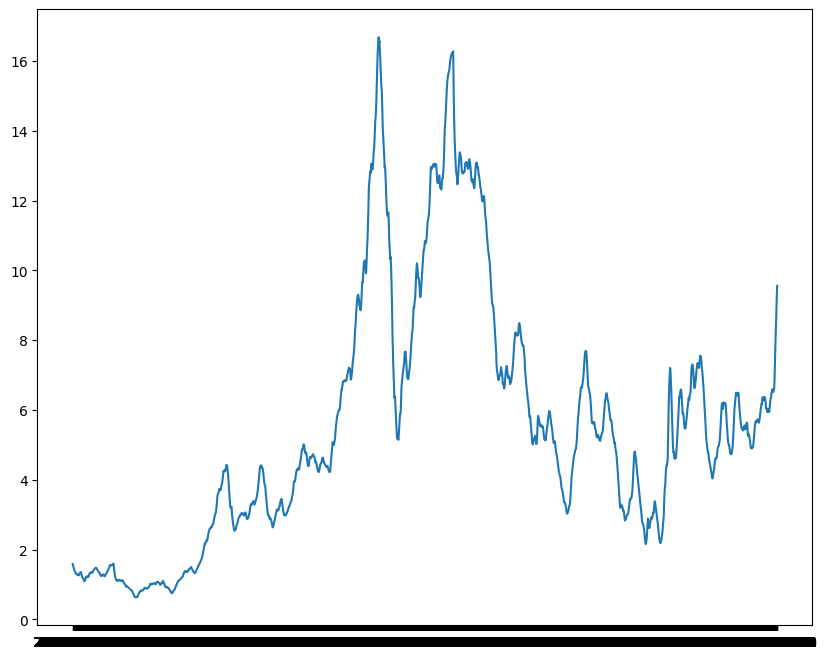

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(dataframe_treino.Date, dataframe_treino.Smoothed_Close)
plt.plot()

In [ ]:
#Normaliza o dataset
# Selecionar todas as colunas exceto a coluna especificada
new_teste = dataframe_teste.drop(['Date','Smoothed_Close','Close'], axis=1)
new_treino = dataframe_treino.drop(['Date','Smoothed_Close','Close'], axis=1)

In [ ]:
new_treino

,Label,Past_1_Days_Close,Past_2_Days_Close,Past_3_Days_Close,Past_4_Days_Close,Past_5_Days_Close,Past_6_Days_Close,Past_7_Days_Close,Past_8_Days_Close,Past_9_Days_Close,Past_10_Days_Close,Past_11_Days_Close,Past_12_Days_Close,Past_13_Days_Close,Past_14_Days_Close,Past_15_Days_Close
0,-1,1.375888,1.478184,1.522513,1.566841,1.594120,1.500348,1.546381,1.704941,1.785073,1.863500,1.841336,1.853271,1.773139,1.682777,1.658908
1,-1,1.409986,1.375888,1.478184,1.522513,1.566841,1.594120,1.500348,1.546381,1.704941,1.785073,1.863500,1.841336,1.853271,1.773139,1.682777
2,-1,1.398052,1.409986,1.375888,1.478184,1.522513,1.566841,1.594120,1.500348,1.546381,1.704941,1.785073,1.863500,1.841336,1.853271,1.773139
3,-1,1.375888,1.398052,1.409986,1.375888,1.478184,1.522513,1.566841,1.594120,1.500348,1.546381,1.704941,1.785073,1.863500,1.841336,1.853271
4,-1,1.363953,1.375888,1.398052,1.409986,1.375888,1.478184,1.522513,1.566841,1.594120,1.500348,1.546381,1.704941,1.785073,1.863500,1.841336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,1,10.390541,10.250756,10.310663,9.432028,9.691624,9.159118,9.811440,10.084350,9.219026,8.706488,8.440235,8.779707,8.719800,8.253856,7.674757
4739,1,10.849827,10.390541,10.250756,10.310663,9.432028,9.691624,9.159118,9.811440,10.084350,9.219026,8.706488,8.440235,8.779707,8.719800,8.253856
4740,1,10.437135,10.849827,10.390541,10.250756,10.310663,9.432028,9.691624,9.159118,9.811440,10.084350,9.219026,8.706488,8.440235,8.779707,8.719800
4741,1,10.583574,10.437135,10.849827,10.390541,10.250756,10.310663,9.432028,9.691624,9.159118,9.811440,10.084350,9.219026,8.706488,8.440235,8.779707


In [ ]:
dataframe_treino['Label'] = dataframe_treino['Label'].replace(-1, 0)
dataframe_teste['Label'] = dataframe_teste['Label'].replace(-1, 0)

In [ ]:
# Extraindo as características e os rótulos
X_train = new_treino.iloc[:, 1:].values  # Todas as colunas exceto a primeira
y_train = new_treino.iloc[:, 0].values   # Apenas a primeira coluna
# Extraindo as características e os rótulos
X_test = new_teste.iloc[:, 1:].values  # Todas as colunas exceto a primeira
y_test = new_teste.iloc[:, 0].values   # Apenas a primeira coluna

#scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))
X_teste = scaler.fit_transform(X_test)
X_treino = scaler.fit_transform(X_train)

In [ ]:
X_treino[10]

array([0.04511266, 0.04541209, 0.04351576, 0.03952347, 0.04151963,
       0.04421441, 0.04621054, 0.0469092 , 0.04820667, 0.04890532,
       0.0469092 , 0.05289758, 0.05549259, 0.05808753, 0.05968444])

In [ ]:
# reshape da entrada para ser [amostras, time steps(look_back), caracteristicas]
# o reshape informa pro modelo o numero de features que a serie ou vetor representa
# para esse caso o valor é 1 pq queremos prever a partir de uma serie
# caso tivesse mais series o valor do reshape corresponderia ao numero de series paralelas(correlacionadas)
X_train = np.reshape(X_treino, (X_treino.shape[0], X_treino.shape[1], 1))
X_test = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))


In [ ]:
X_train.shape

(4743, 15, 1)

In [ ]:
X_test.shape

(1186, 15, 1)

In [ ]:
y_train = dataframe_treino['Label'].values
y_test = dataframe_teste['Label'].values

In [ ]:
y_train[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [ ]:
# Cria e treina a rede LSTM com 64 neuronios
# look_back de 3 definido acima
look_back = 15

model = Sequential([
    LSTM(64, input_shape=(look_back, 1)),  # Camada LSTM com 64 unidades
    Dense(1, activation='sigmoid')  # Camada de saída com ativação sigmóide para classificação binária
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=110, batch_size=32, verbose=1)

Epoch 1/110
149/149 [==============================] - 4s 5ms/step - loss: 0.6868 - accuracy: 0.5583
Epoch 2/110
149/149 [==============================] - 1s 5ms/step - loss: 0.6844 - accuracy: 0.5598
Epoch 3/110
149/149 [==============================] - 1s 5ms/step - loss: 0.6780 - accuracy: 0.5581
Epoch 4/110
149/149 [==============================] - 1s 6ms/step - loss: 0.6621 - accuracy: 0.5849
Epoch 5/110
149/149 [==============================] - 1s 7ms/step - loss: 0.6368 - accuracy: 0.6306
Epoch 6/110
149/149 [==============================] - 1s 7ms/step - loss: 0.6157 - accuracy: 0.6530
Epoch 7/110
149/149 [==============================] - 1s 7ms/step - loss: 0.5673 - accuracy: 0.6945
Epoch 8/110
149/149 [==============================] - 1s 7ms/step - loss: 0.5223 - accuracy: 0.7244
Epoch 9/110
149/149 [==============================] - 1s 5ms/step - loss: 0.5392 - accuracy: 0.7059
Epoch 10/110
149/149 [==============================] - 1s 5ms/step - loss: 0.5152 - accura

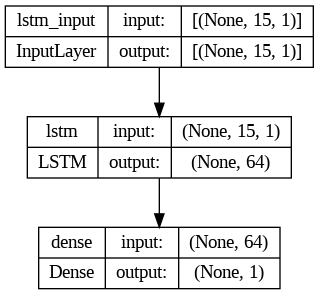

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True)

In [ ]:
# Predições
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

38/38 [==============================] - 0s 3ms/step


In [ ]:
testPredict[:10]

array([[0.7055956 ],
       [0.36533764],
       [0.64082986],
       [0.43620202],
       [0.49181482],
       [0.7258808 ],
       [0.91569114],
       [0.9307907 ],
       [0.94426185],
       [0.9292719 ]], dtype=float32)

In [ ]:
test_pred = (testPredict > 0.5).astype(int)
test_pred[:50]

array([[1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0]])

In [ ]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

38/38 [==============================] - 0s 3ms/step - loss: 0.3458 - accuracy: 0.8550

accuracy: 85.50%


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       688
           1       0.78      0.91      0.84       498

    accuracy                           0.85      1186
   macro avg       0.85      0.86      0.85      1186
weighted avg       0.86      0.85      0.86      1186



In [ ]:
trainPredict.shape

(4743, 1)

38/38 [==============================] - 0s 4ms/step - loss: 0.3458 - accuracy: 0.8550
Model Accuracy: 85.50%
38/38 [==============================] - 0s 3ms/step


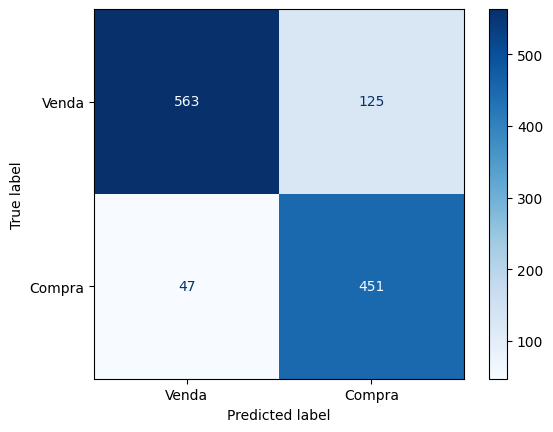

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Avaliação do Modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy: {accuracy*100:.2f}%')

# Predição
predictions = model.predict(X_test)
predicted_labels = (predictions > 0.5).astype(int)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, predicted_labels)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Venda', 'Compra'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
colunas_selecionadas = ['Date', 'Label', 'Smoothed_Close']
novo_df = dataframe_teste[colunas_selecionadas]

In [ ]:
novo_df.rename(columns={'Label': 'Label_Original'}, inplace = True)

<ipython-input-30-599f18337068>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novo_df.rename(columns={'Label': 'Label_Original'}, inplace = True)


In [ ]:
# Converter o numpy.ndarray de volta para um pandas.DataFrame
colunas =['Label']
predicted_dataframe = pd.DataFrame(predicted_labels, columns=colunas)
predicted_dataframe

,Label
0,1
1,0
2,1
3,0
4,0
...,...
1181,1
1182,1
1183,1
1184,1


In [ ]:
# Concatenando os DataFrames
df_concatenado = pd.concat([novo_df, predicted_dataframe],axis=1)

In [ ]:
df_concatenado

,Date,Label_Original,Smoothed_Close,Label
0,2019-03-25,1,9.592937,1
1,2019-03-26,1,9.688007,0
2,2019-03-27,1,9.719654,1
3,2019-03-28,1,9.791402,0
4,2019-03-29,1,9.893916,0
...,...,...,...,...
1181,2023-12-21,1,17.232923,1
1182,2023-12-22,1,17.420631,1
1183,2023-12-26,1,17.614568,1
1184,2023-12-27,1,17.804111,1


In [ ]:
# Implementar estratégia de compra e venda
def backtest(data, predictions):
    capital = 1000  # Capital inicial
    acoes = 0  # Quantidade de ações em posse
    capital_hist = [capital]  # Histórico do capital ao longo do tempo
    real_values = []  # Valores reais das ações ao longo do tempo
    predictions_values = []  # Previsões de compra e venda ao longo do tempo

    for index, row in data.iterrows():
        if predictions[index] == 1:
            acoes += capital / row['Smoothed_Close']
            capital = 0
        elif predictions[index] == 0:
            capital += acoes * row['Smoothed_Close']
            acoes = 0

        capital_hist.append(capital + acoes * row['Smoothed_Close'])
        real_values.append(row['Smoothed_Close'])
        predictions_values.append(predictions[index])

    return capital_hist, real_values, predictions_values

historico_capital, real_values, predictions_values = backtest(df_concatenado, predicted_labels)

In [ ]:
historico_capital = np.array(historico_capital)
historico_capital

[ 1000.          1000.          1009.91038429  1009.91038429
  1017.36529442  1017.36529442  1017.36529442  1029.58812472
  1042.27646994  1052.68329993  1060.90176598  1070.59376666
  1076.41358342  1077.53321975  1075.09780126  1076.61906463
  1076.61906463  1076.61906463  1076.61906463  1076.61906463
  1076.61906463  1076.61906463  1076.61906463  1076.61906463
  1076.61906463  1076.61906463  1076.61906463  1076.61906463
  1076.61906463  1076.61906463  1076.61906463  1076.61906463
  1078.27988879  1080.84868853  1077.94379382  1080.08589678
  1082.01378944  1088.81226188  1097.99957555  1106.26815786
  1123.14619065  1142.32572119  1158.12966213  1174.50130493
  1196.67741161  1210.72864374  1217.85106732  1225.71887507
  1230.03808442  1230.39634803  1236.1657529   1236.1657529
  1236.1657529   1236.1657529   1236.1657529   1236.1657529
  1236.1657529   1240.2427693   1241.30152582  1241.30152582
  1241.30152582  1241.30152582  1241.30152582  1241.30152582
  1241.30152582  1241.3015

In [ ]:
Smoothed_Close = df_concatenado.Smoothed_Close.values
Smoothed_Close

array([ 9.59293745,  9.68800715,  9.7196538 ,  9.79140189,  9.89391616,
       10.03077662, 10.15128838, 10.27638991, 10.3789967 , 10.46002718,
       10.55558607, 10.61296691, 10.62400604, 10.59999388, 10.61499287,
       10.63315104, 10.60955542, 10.57034737, 10.52973519, 10.46589312,
       10.43040115, 10.36917046, 10.29808774, 10.25541371, 10.23586733,
       10.22454151, 10.16909576, 10.19668558, 10.21713371, 10.23115461,
       10.2503472 , 10.26615968, 10.29061689, 10.26295977, 10.28335445,
       10.30170966, 10.36643701, 10.4539082 , 10.53263228, 10.69332579,
       10.87593155, 11.02639878, 11.18227101, 11.39340678, 11.5271867 ,
       11.59499835, 11.6699067 , 11.71102932, 11.7144403 , 11.76937004,
       11.77425133, 11.80932209, 11.84015537, 11.91538236, 12.05466783,
       12.105522  , 12.1454474 , 12.15581559, 12.1359302 , 12.15601504,
       12.15290944, 12.14281001, 12.12933811, 12.09091821, 12.06218375,
       12.05896573, 12.07359947, 12.10722168, 12.09657819, 12.11

In [ ]:
Date = df_concatenado.Date.values
Date

array(['2019-03-25', '2019-03-26', '2019-03-27', '2019-03-28',
       '2019-03-29', '2019-04-01', '2019-04-02', '2019-04-03',
       '2019-04-04', '2019-04-05', '2019-04-08', '2019-04-09',
       '2019-04-10', '2019-04-11', '2019-04-12', '2019-04-15',
       '2019-04-16', '2019-04-17', '2019-04-18', '2019-04-22',
       '2019-04-23', '2019-04-24', '2019-04-25', '2019-04-26',
       '2019-04-29', '2019-04-30', '2019-05-02', '2019-05-03',
       '2019-05-06', '2019-05-07', '2019-05-08', '2019-05-09',
       '2019-05-10', '2019-05-13', '2019-05-14', '2019-05-15',
       '2019-05-16', '2019-05-17', '2019-05-20', '2019-05-21',
       '2019-05-22', '2019-05-23', '2019-05-24', '2019-05-27',
       '2019-05-28', '2019-05-29', '2019-05-30', '2019-05-31',
       '2019-06-03', '2019-06-04', '2019-06-05', '2019-06-06',
       '2019-06-07', '2019-06-10', '2019-06-11', '2019-06-12',
       '2019-06-13', '2019-06-14', '2019-06-17', '2019-06-18',
       '2019-06-19', '2019-06-21', '2019-06-24', '2019-

In [ ]:
Label_Original = df_concatenado.Label_Original.values
Label_Original

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#criado um array com os label original
buy_signals_original = np.full(len(Label_Original), np.nan)
sell_signals_original = np.full(len(Label_Original), np.nan)

# Preencher os arrays de compra e venda com base nos sinais
for i in range(len(Label_Original)):
    if Label_Original[i] == 1:
        buy_signals_original[i] = Smoothed_Close[i]
    elif Label_Original[i] == 0:
        sell_signals_original[i] = Smoothed_Close[i]

In [ ]:
#criado um array com os label previstos
buy_signals_previsto = np.full(len(predicted_labels), np.nan)
sell_signals_previsto = np.full(len(predicted_labels), np.nan)

# Preencher os arrays de compra e venda com base nos sinais
for i in range(len(predicted_labels)):
    if predicted_labels[i] == 1:
        buy_signals_previsto[i] = Smoothed_Close[i]
    elif predicted_labels[i] == 0:
        sell_signals_previsto[i] = Smoothed_Close[i]

In [ ]:
buy_signals_previsto

array([ 9.59293745,         nan,  9.7196538 ,         nan,         nan,
       10.03077662, 10.15128838, 10.27638991, 10.3789967 , 10.46002718,
       10.55558607, 10.61296691, 10.62400604, 10.59999388,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
       10.2503472 , 10.26615968, 10.29061689, 10.26295977, 10.28335445,
       10.30170966, 10.36643701, 10.4539082 , 10.53263228, 10.69332579,
       10.87593155, 11.02639878, 11.18227101, 11.39340678, 11.5271867 ,
       11.59499835, 11.6699067 , 11.71102932, 11.7144403 ,         nan,
               nan,         nan,         nan,         nan,         nan,
       12.105522  , 12.1454474 ,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,      

In [ ]:
buy_signals_original

array([ 9.59293745,  9.68800715,  9.7196538 ,  9.79140189,  9.89391616,
       10.03077662, 10.15128838, 10.27638991, 10.3789967 , 10.46002718,
       10.55558607, 10.61296691, 10.62400604,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan, 10.23115461,
       10.2503472 , 10.26615968, 10.29061689,         nan,         nan,
               nan, 10.36643701, 10.4539082 , 10.53263228, 10.69332579,
       10.87593155, 11.02639878, 11.18227101, 11.39340678, 11.5271867 ,
       11.59499835, 11.6699067 , 11.71102932, 11.7144403 , 11.76937004,
       11.77425133, 11.80932209, 11.84015537, 11.91538236, 12.05466783,
       12.105522  , 12.1454474 , 12.15581559,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,      

In [ ]:
#CODIgo para o plotly
import plotly.graph_objs as go
fig = go.Figure()

# Criar o gráfico da série temporal
fig = go.Figure()

# Adicionar a linha de valor de fechamento
fig.add_trace(go.Scatter(x=Date, y=Smoothed_Close, mode='lines', name='Closed Value'))

# original
# Adicionar pontos de compra
fig.add_trace(go.Scatter(x=Date, y=buy_signals_original, mode='markers', name='Buy Signal', marker=dict(color='green', size=8, symbol='triangle-up')))
# Adicionar pontos de venda
fig.add_trace(go.Scatter(x=Date, y=sell_signals_original, mode='markers', name='Sell Signal', marker=dict(color='red', size=8, symbol='triangle-down')))


# Previsto
# Adicionar pontos de compra
fig.add_trace(go.Scatter(x=Date, y=buy_signals_previsto, mode='markers', name='Buy Signal previsto', marker=dict(color='yellow', size=8, symbol='triangle-up')))

# Adicionar pontos de venda
fig.add_trace(go.Scatter(x=Date, y=sell_signals_previsto, mode='markers', name='Sell Signal previsto', marker=dict(color='pink', size=8, symbol='triangle-down')))

# valor
fig.add_trace(go.Scatter(x=Date, y=historico_capital, mode='lines', name='Capital ao longo do tempo',yaxis='y2'))


# Configurar layout para usar dois eixos y
fig.update_layout(
    title='Desempenho do modelo via backtest',
    xaxis_title='Período',
    yaxis=dict(
        title='Valor do Ativo',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue')
    ),
    yaxis2=dict(
        title='Capital',
        titlefont=dict(color='orange'),
        tickfont=dict(color='orange'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.1, y=1.0)
)

fig.show()